# Analysing Diamonds

In this notebook I'm going to analyse diaomonds using machine learning to for instance calculate their price.

In [23]:
# First some setup
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt


def evaluate_cross_validation(clf, X, y, K):
    # Create a k-fold cross validation iterator of k=5 folds
    cv = KFold(K, shuffle=True, random_state=0)
    # By default the score used is the one returned by score method of the estimator (accuracy)
    scores = []
    for train, test in cv.split(X):
        clf.fit(X.iloc[train], y.iloc[train])
        y_pred = clf.predict(X.iloc[test])
        scores += [metrics.explained_variance_score(y.iloc[test], y_pred)]
    # scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: {0:.3f}".format(np.mean(scores)))
    print("Standard error of the mean: (+/-{0:.3f})".format(sem(scores)))


def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("Accuracy on training set:")
    print(clf.score(X_train, y_train))
    print("Accuracy on testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

In [2]:
# load the data-set

diamonds = pd.read_csv('MiniProject/diamonds.csv', sep=',')
diamonds.columns = ["id", "carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"]

print(diamonds.dtypes)
diamonds[:10]

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
# map cut, color and clarity

diamonds['old_cut'] = diamonds['cut']
diamonds['cut'] = diamonds['cut'].map({
    'Fair': 0,  # worst
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4  # best
})

diamonds['old_color'] = diamonds['color']
diamonds['color'] = diamonds['color'].map(
    {
        'J': 0,  # worst
        'I': 1,
        'H': 2,
        'G': 3,
        'F': 4,
        'E': 5,
        'D': 6  # best
    }
)

diamonds['old_clarity'] = diamonds['clarity']
diamonds['clarity'] = diamonds['clarity'].map(
    {
        'I3': 0,  # worst
        'I2': 1,
        'I1': 2,
        'SI2': 3,
        'SI1': 4,
        'VS2': 5,
        'VS1': 6,
        'VVS2': 7,
        'VVS1': 8,
        'IF': 9,
        'FL': 10  # best
    }
)

diamonds[:10]

,id,carat,cut,color,clarity,depth,table,price,x,y,z,old_cut,old_color,old_clarity
0,1,0.23,4,5,3,61.5,55.0,326,3.95,3.98,2.43,Ideal,E,SI2
1,2,0.21,3,5,4,59.8,61.0,326,3.89,3.84,2.31,Premium,E,SI1
2,3,0.23,1,5,6,56.9,65.0,327,4.05,4.07,2.31,Good,E,VS1
3,4,0.29,3,1,5,62.4,58.0,334,4.20,4.23,2.63,Premium,I,VS2
4,5,0.31,1,0,3,63.3,58.0,335,4.34,4.35,2.75,Good,J,SI2
5,6,0.24,2,0,7,62.8,57.0,336,3.94,3.96,2.48,Very Good,J,VVS2
6,7,0.24,2,1,8,62.3,57.0,336,3.95,3.98,2.47,Very Good,I,VVS1
7,8,0.26,2,2,4,61.9,55.0,337,4.07,4.11,2.53,Very Good,H,SI1
8,9,0.22,0,5,5,65.1,61.0,337,3.87,3.78,2.49,Fair,E,VS2
9,10,0.23,2,2,6,59.4,61.0,338,4.00,4.05,2.39,Very Good,H,VS1


## Analysis
Now the preperation is done, the analysis can begin.  
The dataset fully consists out of numbers and is ready to be trained up on.

First try to calculate the price

In [4]:
y = diamonds['price']
X = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

### WARNING! Do not run the following block if you do not need to. It takes a long time

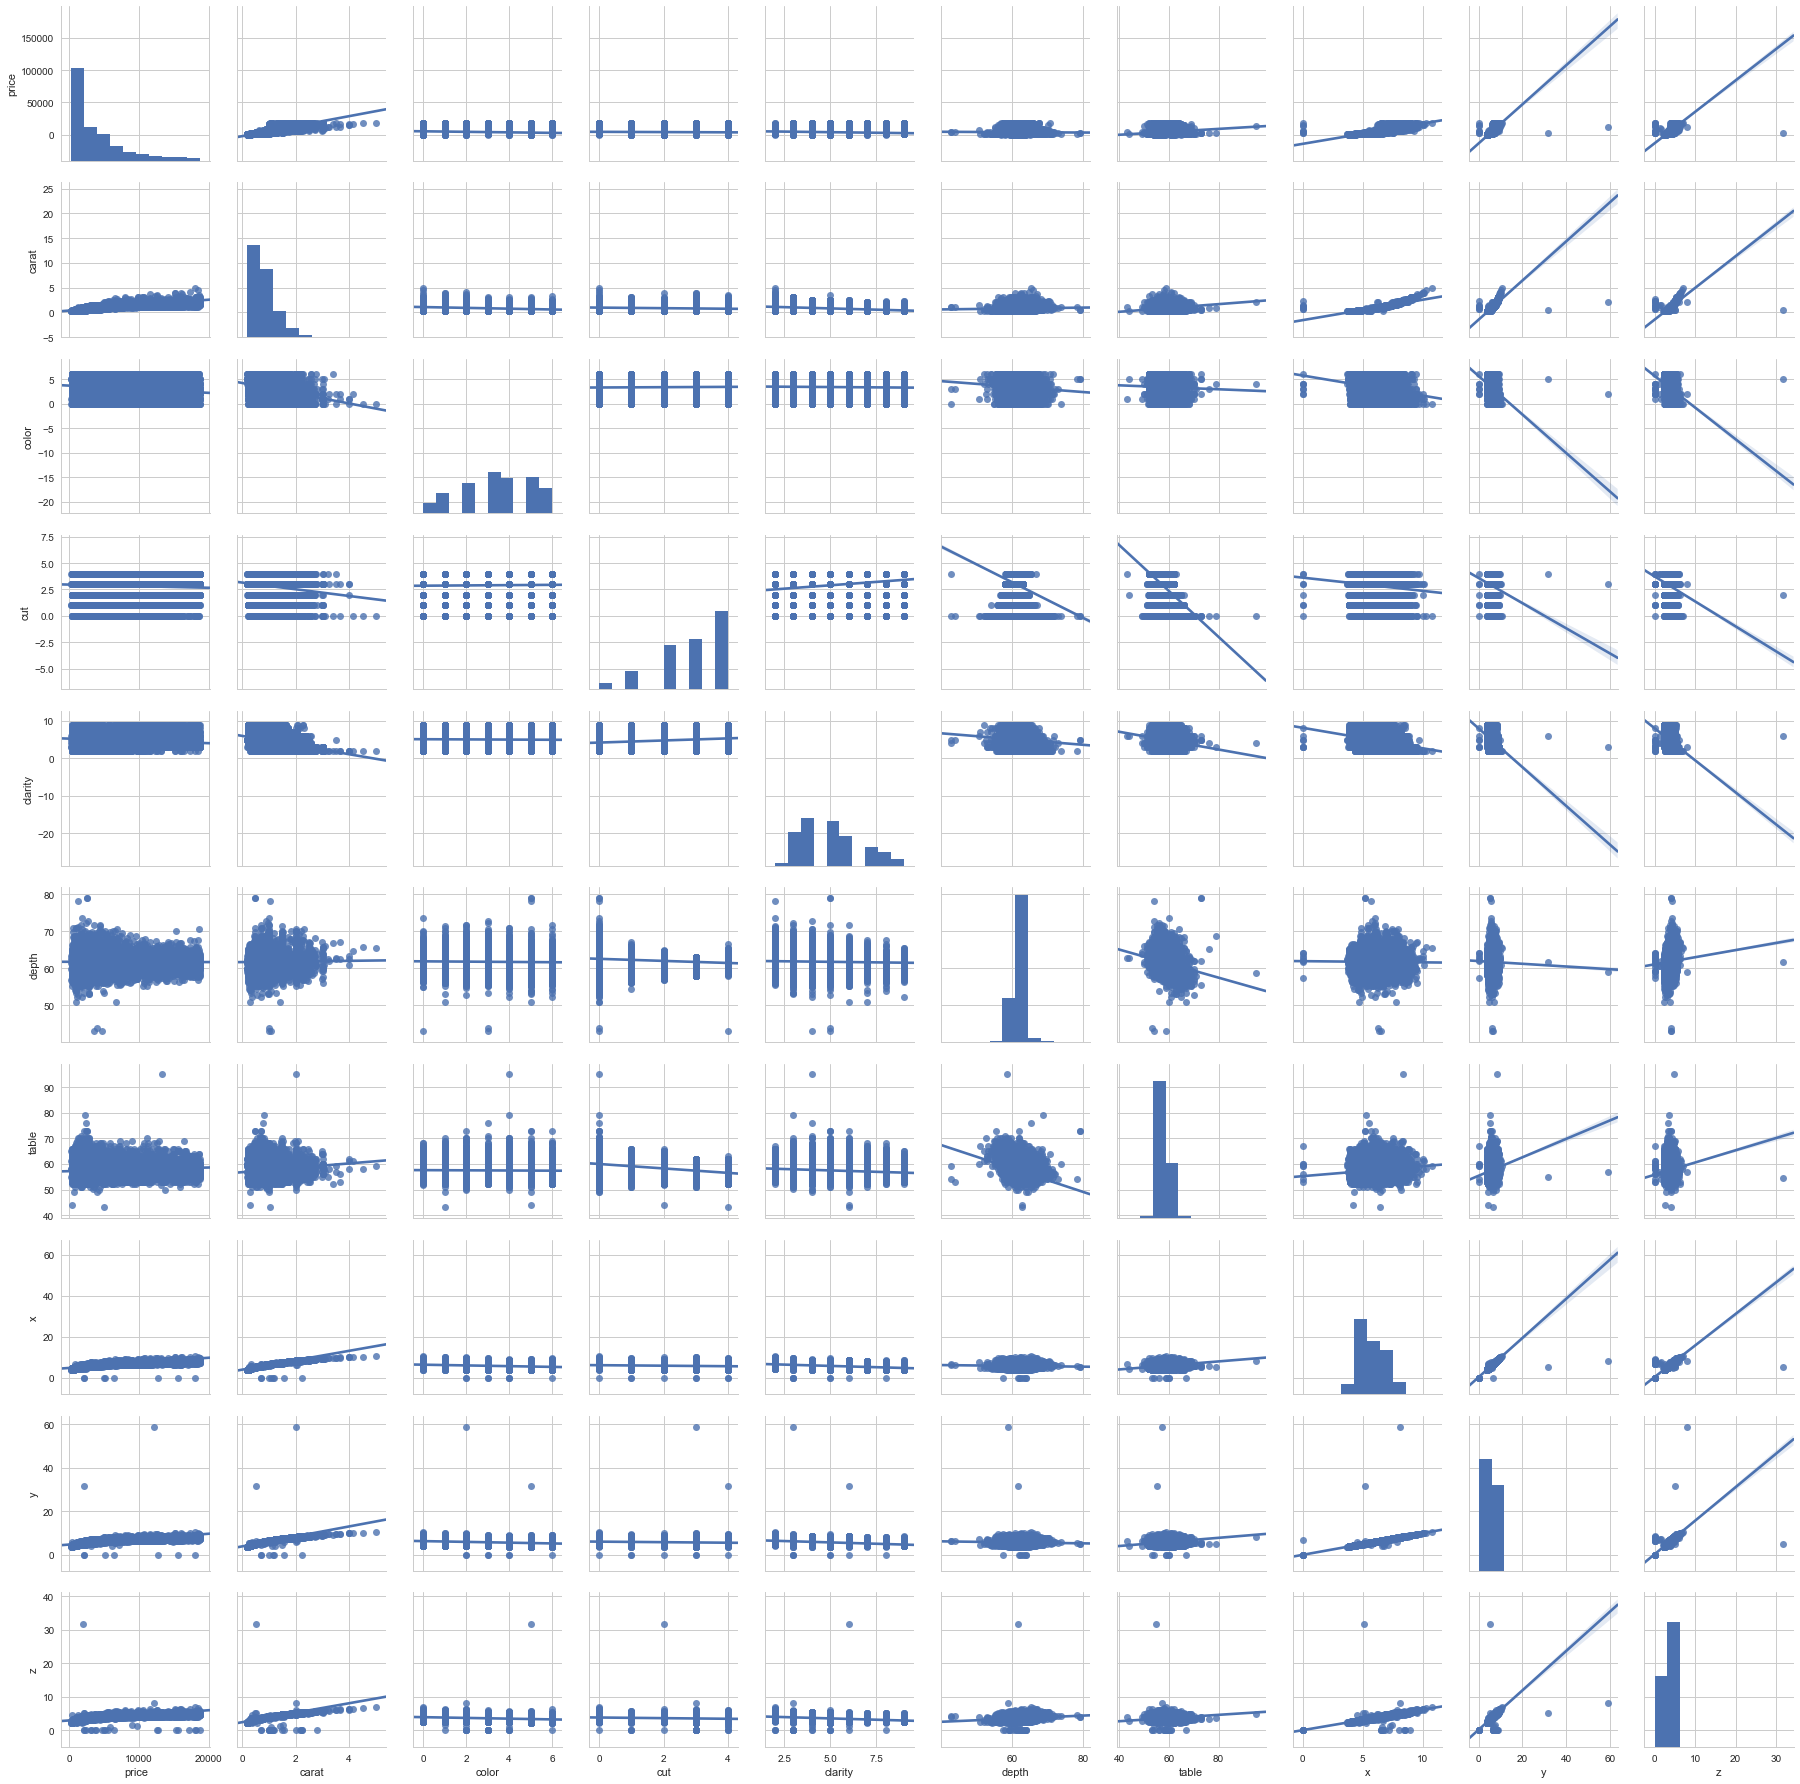

In [6]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(diamonds, kind='reg', vars=['price', 'carat', 'color', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], size=2.5)
plt.show()

In the previous graph you can see that carat, x, y and z have the bigest infuence on the price.  
Table and depth do not seem to infuence it.

cut, color and clarity seem to not influence the price on it's own, but maybe combined it does.  
Let's check!

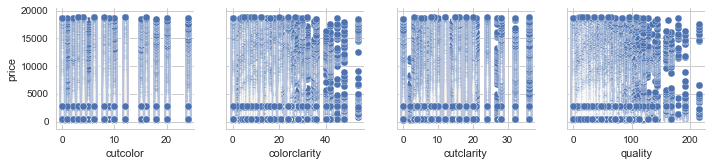

In [7]:
diamonds['quality'] = diamonds['cut'] * diamonds['color'] * diamonds['clarity']
diamonds['cutcolor'] = diamonds['cut'] * diamonds['color']
diamonds['colorclarity'] = diamonds['color'] * diamonds['clarity']
diamonds['cutclarity'] = diamonds['cut'] * diamonds['clarity']

plt.clf()
sns.pairplot(diamonds, kind='scatter', x_vars=['cutcolor', 'colorclarity', 'cutclarity', 'quality'], y_vars=['price'], size=2.5)
plt.show()

# Correlation
x, y and z seem to be coralated to carat, as they should be.  
Carat is the weight of the diamond, and that is relative to it's size.

What is weird is that table and depth are not realy correlated, while they are derrived from x, y and z.

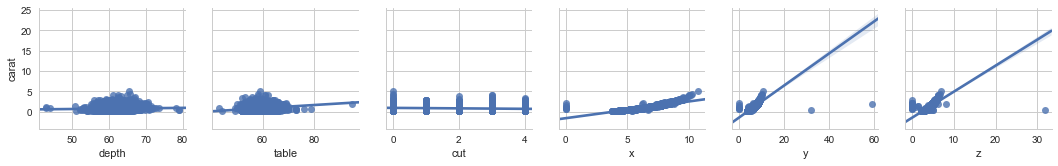

In [8]:
plt.clf()
sns.pairplot(diamonds, kind='reg', x_vars=['depth', 'table', 'cut', 'x', 'y', 'z'], y_vars=['carat'], size=2.5)
plt.show()

# Let's test a discision tree

As a dicsision tree seems to be the best option because of how diamonds are priced.  
See for instance http://www.diamonds.net/Prices/RapaportPriceGuide.aspx


In [33]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=5)

evaluate_cross_validation(clf, X, y, 5)

[0.89783422196543794, 0.89038540783614439, 0.89313119519888318, 0.90046972047258278, 0.8742842721149966]
Mean score: 0.891
Standard error of the mean: (+/-0.005)


An accuracy of at leas 89%, that's amazing!  
But a 89% accuracy for a price is not the best.  
Let's try some other algorithms to see if they give beter results.